In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import time

In [6]:
# -----------------------------------
# 1️⃣ Bombay/Mumbai Bounding Box
# -----------------------------------
# left, bottom, right, top
west  = 72.75
south = 18.85
east  = 73.40
north = 20.05

# west = 72.7752
# south = 18.8928
# east = 72.9865
# north = 19.2711


print("Downloading Mumbai road network...")
G = ox.graph_from_bbox((west, south, east, north), network_type="drive")
print("Road network downloaded successfully!\n")

# -----------------------------------
# 2️⃣ Extract Hospitals Around Mumbai
# -----------------------------------
print("Extracting train stations from OpenStreetMap...")

tags = {"railway": "station"}

# correct function for your OSMnx version
pois = ox.features_from_bbox((west, south, east, north), tags)

# keep only those with a name
pois = pois[["name", "geometry"]].dropna()

# convert to lat/lon
pois["latitude"] = pois.geometry.centroid.y
pois["longitude"] = pois.geometry.centroid.x

print(f"{len(pois)} stations found!\n")

# Optional: Save dataset
pois[["name", "latitude", "longitude"]].to_csv("railway_mumbai.csv", index=False)
ox.save_graphml(G, "mumbai_graph.graphml")

print("Saved Mumbai City Geography Dataset")

Road network downloaded successfully!

Saved Mumbai City Geography Dataset


In [2]:
pois = pd.read_csv("railway_mumbai.csv")
G = ox.load_graphml("mumbai_graph.graphml")

Train Stations:

0. Vasai Road
1. Naigaon
2. Bhayandar
3. Kharbhav
4. Palghar
5. Bhivandi Road
6. Dahisar
7. Santa Cruz
8. Thane
9. Ambivli
10. Titwala
11. Khadavli
12. Vithalwadi
13. Ambernath
14. Badlapur
15. Khar Road
16. Chikhale
17. Apta
18. Vaitarna
19. Saphale
20. Kalva
21. Kanjur Marg
22. Vidyavihar
23. Lower Parel
24. Diva Junction
25. Grant Road
26. Chembur
27. Bhakti Park
28. Wadala Depot
29. Karjat
30. Neral
31. Palasdhari
32. Sewri
33. Cotton Green
34. Asangaon
35. Atgaon
36. Khardi
37. Vasind
38. Chowk
39. Bhivpuri Road
40. Shelu
41. Umroli
42. Boisar
43. Kelve Road
44. Mumbra
45. Dativali
46. Mansarovar
47. Mysore Colony
48. Mulund
49. Khandeshwar
50. King's Circle
51. Matheran
52. Jumma Patti
53. Water Pipe
54. Shahad
55. Sandhurst Road
56. Thakurli
57. Dockyard Road
58. Reay Road
59. Currey Road
60. Chembur
61. Aman Lodge
62. Mankhurd
63. Nahur
64. Bandra
65. Byculla
66. Charni Road
67. Dadar
68. Dadar
69. Mahim Junction
70. Marine Lines
71. Mumbai Central
72. Panvel
7

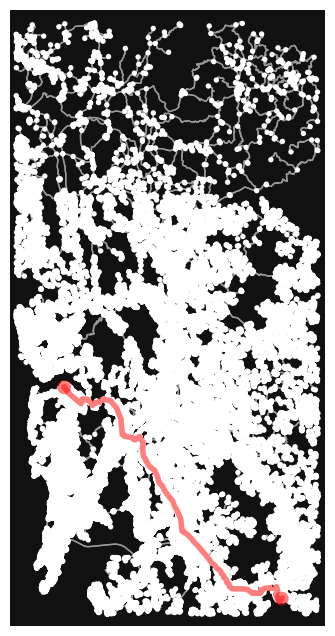

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# -----------------------------------
# 3️⃣ Display Train Station List to User
# -----------------------------------
pois = pois.reset_index(drop=True)

print("Train Stations:\n")
for i, name in enumerate(pois["name"]):
    print(f"{i}. {name}")

source_index = int(input("\nSelect source (number): "))
dest_index = int(input("Select destination (number): "))

source = pois.iloc[source_index]
dest = pois.iloc[dest_index]

# -----------------------------------
# 4️⃣ Map to Graph Nodes
# -----------------------------------
orig_node = ox.distance.nearest_nodes(G, source["longitude"], source["latitude"])
dest_node = ox.distance.nearest_nodes(G, dest["longitude"], dest["latitude"])

# -----------------------------------
# 5️⃣ Run Dijkstra Algorithm
# -----------------------------------
print("\nRunning Dijkstra Algorithm...")
start_time = time.time()

route = nx.shortest_path(G, orig_node, dest_node, weight="length")

end_time = time.time()
distance = nx.shortest_path_length(G, orig_node, dest_node, weight="length")

print("\nShortest Distance: {:.2f} meters".format(distance))
print("Execution Time: {:.4f} seconds".format(end_time - start_time))

# -----------------------------------
# 6️⃣ Plot Route
# -----------------------------------
print("\nDisplaying route on map...")
ox.plot_graph_route(G, route)

# Cleaning Local Train Dataset

In [12]:
df = pd.read_csv('Mumbai Local Train Dataset.csv', encoding="latin1")
df = df [["Station","Station Code","Line","Distance From Previous of the Line","Time taken From Previous of the Line"]]
display(df)

df["Distance From Previous of the Line"] = (
    df["Distance From Previous of the Line"]
    .str.replace(" KM", "", regex=False)
    .astype(float)
)

df["Time taken From Previous of the Line"] = (
    df["Time taken From Previous of the Line"]
    .str.replace(" min", "", regex=False)
    .astype(float)
)

display(df)

df.to_csv('Cleaned Local Train Dataset.csv')

,Station,Station Code,Line,Distance From Previous of the Line,Time taken From Previous of the Line
0,Churchgate,CCG,Western,0 KM,0 min
1,Marine Lines,MEL,Western,1 KM,3 min
2,Charni Road,CYR,Western,1 KM,2 min
3,Grant Road,GTR,Western,1 KM,3 min
4,Mumbai Central,MMCT,Western,1 KM,2 min
...,...,...,...,...,...
197,Neral,NRL,Neral-Matheran,0 KM,0 min
198,Jumapatti,JTT,Neral-Matheran,5 KM,46 min
199,Waterpipe,WTP,Neral-Matheran,6 KM,46 min
200,Aman Lodge,AMNA,Neral-Matheran,7 KM,50 min


,Station,Station Code,Line,Distance From Previous of the Line,Time taken From Previous of the Line
0,Churchgate,CCG,Western,0.0,0.0
1,Marine Lines,MEL,Western,1.0,3.0
2,Charni Road,CYR,Western,1.0,2.0
3,Grant Road,GTR,Western,1.0,3.0
4,Mumbai Central,MMCT,Western,1.0,2.0
...,...,...,...,...,...
197,Neral,NRL,Neral-Matheran,0.0,0.0
198,Jumapatti,JTT,Neral-Matheran,5.0,46.0
199,Waterpipe,WTP,Neral-Matheran,6.0,46.0
200,Aman Lodge,AMNA,Neral-Matheran,7.0,50.0


# Create The Mapping

Train Stations:

0. Vasai Road
1. Naigaon
2. Palghar
3. Dahisar
4. Thane
5. Ambivli
6. Titwala
7. Khadavli
8. Vithalwadi
9. Ambernath
10. Khar Road
11. Apta
12. Vaitarna
13. Saphale
14. Kalva
15. Kanjur Marg
16. Lower Parel
17. Diva Junction
18. Grant Road
19. Chembur
20. Karjat
21. Neral
22. Palasdhari
23. Sewri
24. Cotton Green
25. Asangaon
26. Khardi
27. Vasind
28. Bhivpuri Road
29. Shelu
30. Boisar
31. Kelve Road
32. Mumbra
33. Dativali
34. Mansarovar
35. Mulund
36. Khandeshwar
37. Matheran
38. Shahad
39. Sandhurst Road
40. Thakurli
41. Reay Road
42. Currey Road
43. Chembur
44. Aman Lodge
45. Mankhurd
46. Nahur
47. Bandra
48. Byculla
49. Charni Road
50. Dadar
51. Dadar
52. Mahim Junction
53. Marine Lines
54. Mumbai Central
55. Panvel
56. Vile Parle
57. Virar
58. Sion
59. Govandi
60. Bhandup
61. Borivali
62. Kandivali
63. Malad
64. Goregaon
65. Prabhadevi
66. Chinchpokli
67. Parel
68. Naigaon
69. Vikhroli
70. Churchgate
71. Matunga
72. Matunga Road
73. Ghatkopar
74. Nalla Sopara
75.

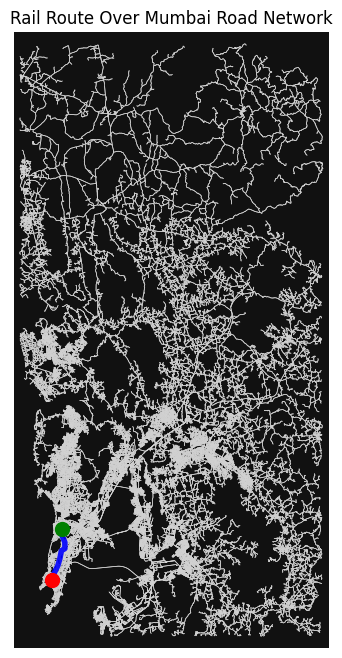

In [4]:
import pandas as pd
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import re
from difflib import get_close_matches

# -------------------------------------------------
# 1️⃣ Normalization Function
# -------------------------------------------------
def normalize(name):
    name = str(name).lower().strip()
    name = re.sub(r"\(.*?\)", "", name)
    name = name.replace("junction", "")
    name = name.replace("jn", "")
    name = re.sub(r"\s+", " ", name)
    return name.strip()

# -------------------------------------------------
# 2️⃣ Load Rail Dataset
# -------------------------------------------------
df = pd.read_csv("Cleaned Local Train Dataset.csv")
df["station_clean"] = df["Station"].apply(normalize)

# -------------------------------------------------
# 3️⃣ Build Rail Graph
# -------------------------------------------------
G_rail = nx.Graph()

for _, row in df.iterrows():
    G_rail.add_node(row["station_clean"], original=row["Station"])

for line, group in df.groupby("Line", sort=False):
    group = group.reset_index(drop=True)

    for i in range(1, len(group)):
        prev_station = group.loc[i - 1, "station_clean"]
        curr_station = group.loc[i, "station_clean"]
        distance = group.loc[i, "Distance From Previous of the Line"]

        G_rail.add_edge(
            prev_station,
            curr_station,
            weight=distance,
            line=line
        )

rail_nodes = list(G_rail.nodes)

# -------------------------------------------------
# 4️⃣ Load Station Coordinates
# -------------------------------------------------
pois = pd.read_csv("railway_mumbai.csv").reset_index(drop=True)
pois["station_clean"] = pois["name"].apply(normalize)

# Keep only stations that exist in rail graph
pois = pois[pois["station_clean"].isin(rail_nodes)].reset_index(drop=True)

poi_lookup = dict(
    zip(
        pois["station_clean"],
        zip(pois["latitude"], pois["longitude"])
    )
)

poi_names = pois["station_clean"].tolist()

# -------------------------------------------------
# 5️⃣ Safe Rail Node Matching
# -------------------------------------------------
def match_to_rail_node(name_clean):

    if name_clean in G_rail:
        return name_clean

    match = get_close_matches(name_clean, rail_nodes, n=1, cutoff=0.8)

    if match:
        print(f"Fuzzy matched rail node: {name_clean} → {match[0]}")
        return match[0]

    return None

# -------------------------------------------------
# 6️⃣ Coordinate Lookup with Fuzzy Matching
# -------------------------------------------------
def get_coordinates(station_clean):

    if station_clean in poi_lookup:
        return poi_lookup[station_clean]

    match = get_close_matches(station_clean, poi_names, n=1, cutoff=0.8)

    if match:
        print(f"Fuzzy matched coordinates: {station_clean} → {match[0]}")
        return poi_lookup[match[0]]

    print(f"No coordinate match for: {station_clean}")
    return None

# -------------------------------------------------
# 7️⃣ Display Valid Station List
# -------------------------------------------------
print("Train Stations:\n")
for i, name in enumerate(pois["name"]):
    print(f"{i}. {name}")

source_index = int(input("\nSelect source (number): "))
dest_index = int(input("Select destination (number): "))

source_clean = normalize(pois.iloc[source_index]["name"])
dest_clean = normalize(pois.iloc[dest_index]["name"])

source_name = match_to_rail_node(source_clean)
dest_name = match_to_rail_node(dest_clean)

if source_name is None or dest_name is None:
    raise ValueError("Selected station not found in rail network.")

# -------------------------------------------------
# 8️⃣ Compute Rail Shortest Path
# -------------------------------------------------
route_stations = nx.shortest_path(
    G_rail,
    source_name,
    dest_name,
    weight="weight"
)

total_distance = nx.shortest_path_length(
    G_rail,
    source_name,
    dest_name,
    weight="weight"
)

print("Source:",source_name)
print("Destination:",dest_name)

print("\nRail Route:")
for station in route_stations:
    print(station.title())

print("\nTotal Distance:", total_distance, "KM")

# -------------------------------------------------
# 9️⃣ Plot Rail Route Over Mumbai Map
# -------------------------------------------------

# Plot Mumbai road network as background
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    node_size=0,
    edge_color="lightgray",
    edge_linewidth=0.5
)

route_lats = []
route_lons = []

for station in route_stations:
    coords = get_coordinates(station)
    if coords is None:
        continue

    lat, lon = coords
    route_lats.append(lat)
    route_lons.append(lon)

# Draw straight rail route
ax.plot(
    route_lons,
    route_lats,
    color="blue",
    linewidth=4,
    alpha=0.9
)

# Highlight source and destination
ax.scatter(route_lons[0], route_lats[0], c="green", s=100, zorder=5)
ax.scatter(route_lons[-1], route_lats[-1], c="red", s=100, zorder=5)

plt.title("Rail Route Over Mumbai Road Network")
plt.show()


# Bus Dataset Downloaded from 
https://data.opencity.in/dataset/mumbai-best-bus-stops-and-depots-data/resource/514eadc2-7fa8-4749-87e5-ebe486487f09

In [1]:
import geopandas as gpd

# Read KML
gdf = gpd.read_file("mumbai-best-stops.kml", driver="KML")
display(gdf)
gdf["longitude"] = gdf.geometry.x
gdf["latitude"] = gdf.geometry.y
gdf["Name"] = gdf["Name"].str.strip()
gdf = gdf[["Name","longitude","latitude"]]

gdf.to_csv("Bus Dataset.csv")
display(gdf)


/usr/local/python/3.12.1/lib/python3.12/site-packages/pyogrio/geopandas.py:382: UserWarning: More than one layer found in 'mumbai-best-stops.kml': 'mumbai-best-stops.kml' (default), 'mumbai-bus-depots.kml'. Specify layer parameter to avoid this warning.
  result = read_func(
/usr/local/python/3.12.1/lib/python3.12/site-packages/pyogrio/raw.py:200: RuntimeWarning: Value '1 ' of field mumbai-best-stops.kml.OBJECTID parsed incompletely to integer 1.
  return ogr_read(
/usr/local/python/3.12.1/lib/python3.12/site-packages/pyogrio/raw.py:200: RuntimeWarning: Value '2 ' of field mumbai-best-stops.kml.OBJECTID parsed incompletely to integer 2.
  return ogr_read(
/usr/local/python/3.12.1/lib/python3.12/site-packages/pyogrio/raw.py:200: RuntimeWarning: Value '3 ' of field mumbai-best-stops.kml.OBJECTID parsed incompletely to integer 3.
  return ogr_read(
/usr/local/python/3.12.1/lib/python3.12/site-packages/pyogrio/raw.py:200: RuntimeWarning: Value '4 ' of field mumbai-best-stops.kml.OBJECTID p

,id,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,BEST_APP_1,BEST_BUS_S,BEST_HELP_,OBJECTID,TWITTER_HA,WEBSITE,geometry
0,None,"\n ELECTRIC HOUSE, COLABA DEPOT\n",None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...","ELECTRIC HOUSE, COLABA DEPOT\n",1800227550\n,1,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.83003 18.9201 0)
1,None,"\n COLABA BUS STATION, POST OFFICE\n",None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...","COLABA BUS STATION, POST OFFICE\n",1800227550\n,2,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.8209 18.91118 0)
2,None,\n DHOBI GHAT (NAVY NAGAR)\n,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...",DHOBI GHAT (NAVY NAGAR)\n,1800227550\n,3,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.81243 18.90698 0)
3,None,\n DR. SHYAMAPRASAD MUKHERJEE CHOWK(MUSEUM...,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...",DR. SHYAMAPRASAD MUKHERJEE CHOWK(MUSEUM)\n,1800227550\n,4,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.83155 18.92607 0)
4,None,\n DR. SHYAMAPRASAD MUKHERJEE CHOWK(MUSEUM...,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...",DR. SHYAMAPRASAD MUKHERJEE CHOWK(MUSEUM)\n,1800227550\n,5,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.83158 18.92622 0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6238,None,\n GORAI BRIDGE\n,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...",GORAI BRIDGE\n,1800227550\n,6239,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.82805 19.22598 0)
6239,None,\n VATSALABAI DESAI CHOWK (HAJI ALI)\n,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...",VATSALABAI DESAI CHOWK (HAJI ALI)\n,1800227550\n,6240,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.81283 18.97986 0)
6240,None,\n WESTERN PARK\n,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...",WESTERN PARK\n,1800227550\n,6241,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.89068 19.2735 0)
6241,None,\n VIKAS NAGAR SOCIETY (ANDHERI-E)\n,None,NaT,NaT,NaT,None,-1,0,-1,NaN,None,"Android - https://bit.ly/3clkZsf, iOS - https...",VIKAS NAGAR SOCIETY (ANDHERI-E)\n,1800227550\n,6242,@myBESTBus\n,www.bestundertaking.com\n,POINT Z (72.8604 19.12908 0)


,Name,longitude,latitude
0,"ELECTRIC HOUSE, COLABA DEPOT",72.830029,18.920099
1,"COLABA BUS STATION, POST OFFICE",72.820905,18.911184
2,DHOBI GHAT (NAVY NAGAR),72.812432,18.906977
3,DR. SHYAMAPRASAD MUKHERJEE CHOWK(MUSEUM),72.831553,18.926071
4,DR. SHYAMAPRASAD MUKHERJEE CHOWK(MUSEUM),72.831582,18.926225
...,...,...,...
6238,GORAI BRIDGE,72.828050,19.225984
6239,VATSALABAI DESAI CHOWK (HAJI ALI),72.812832,18.979865
6240,WESTERN PARK,72.890683,19.273500
6241,VIKAS NAGAR SOCIETY (ANDHERI-E),72.860396,19.129078


## Extracting bus stop geography

In [8]:


west = 72.7752
south = 18.8928
east = 72.9865
north = 19.2711

tags = {"highway": "bus_stop"}

# correct function for your OSMnx version
pois = ox.features_from_bbox((west, south, east, north), tags)

# keep only those with a name
pois = pois[["name", "geometry"]].dropna()

# convert to lat/lon
pois["latitude"] = pois.geometry.centroid.y
pois["longitude"] = pois.geometry.centroid.x

print(f"{len(pois)} bus stops found!\n")

pois = pois[["name","latitude","longitude"]]
pois.to_csv("Bus Dataset 2.csv", index=False)
display(pois)

1502 bus stops found!



/tmp/ipykernel_2147/4070774767.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["latitude"] = pois.geometry.centroid.y
/tmp/ipykernel_2147/4070774767.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pois["longitude"] = pois.geometry.centroid.x


name   latitude  longitude
element id                                                        
node    246449135          Agarwadi Bus stop  19.045845  72.925748
        246472067                BARC Gate 6  19.042174  72.932989
        317914119                 Talao Pali  19.194384  72.976962
        340363221          Thane Station (W)  19.187007  72.976997
        414595018         Shishu Gyan Mandir  19.199800  72.977309
...                                      ...        ...        ...
        13506627048     Ranade Road Junction  19.022292  72.837999
        13570047833  Laxmi Industrial Estate  19.135701  72.831914
        13571985198             Kheera Nagar  19.086955  72.838057
        13571985200             Kheera Nagar  19.086992  72.838061
way     1109686323         Vrindavan Society  19.208341  72.982790

[1502 rows x 3 columns]

# Bus Route Data Taken From
https://github.com/chalobest/ChaloBEST/blob/master/chaloBEST/gtfs/gtfs_mumbai_bus/trips.txt

In [16]:
r = pd.read_csv('routes.txt')
t = pd.read_csv('trips.txt')
st = pd.read_csv('stop_times.txt')
s = pd.read_csv('stops.txt')

r = r[["route_id","route_short_name","route_long_name"]]
r.to_csv("routes.csv",index=False)

t = t[["route_id","trip_id"]]
t.to_csv("trips.csv",index=False)

st.to_csv("stop_times.csv",index=False)

s = s[["stop_id","stop_name","stop_lat","stop_lon"]]
s.to_csv("stops.csv",index=False)

display(r)
display(t)
display(st)
display(s)


,route_id,route_short_name,route_long_name
0,10,1,R.C.CHURCH - BND RECLAMATION BUS STN.
1,11,1LT,COLABA BUS STN. - SANTACRUZ DEPOT
2,17,AS-,BACKBAY DEPOT - CADBURY JN.(THANE)
3,21,2LT,R.C.CHURCH - MAROL DEPOT
4,27,AS-,BACKBAY DEPOT - DAHISAR BUS STN.
...,...,...,...
525,9010,WOR,SHIVAJI NGR.DEPOT - AIROLI BUS STN.
526,9020,WOR,SHIVAJI NGR.DEPOT - DEONAR DEPOT
527,9030,WOR,VIKHROLI DEPOT - VIKHROLI DEPOT
528,9040,WOR,VIKHROLI PARK SITE - VIKHROLI DEPOT


,route_id,trip_id
0,3070,3070_4654_SUN_UP
1,3070,3070_4654_SUN_DOWN
2,3070,3070_4656_MS_UP
3,3070,3070_4656_MS_DOWN
4,3050,3050_4650_MS_UP
...,...,...
3237,5091,5091_4757_FW_DOWN
3238,5331,5331_4796_MS_UP
3239,5331,5331_4796_MS_DOWN
3240,426,0426_4868_SAT&HOL_UP


,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,3070_4654_SUN_UP,05:02:00,05:02:00,397,1
1,3070_4654_SUN_UP,NaN,NaN,437,2
2,3070_4654_SUN_UP,NaN,NaN,3972,3
3,3070_4654_SUN_UP,05:07:22,05:07:32,494,4
4,3070_4654_SUN_UP,NaN,NaN,481,5
...,...,...,...,...,...
114159,0426_4868_SAT&HOL_DOWN,08:08:53,08:09:03,319,27
114160,0426_4868_SAT&HOL_DOWN,08:11:02,08:11:12,3056,28
114161,0426_4868_SAT&HOL_DOWN,08:12:22,08:12:32,171,29
114162,0426_4868_SAT&HOL_DOWN,08:13:43,08:13:53,170,30


,stop_id,stop_name,stop_lat,stop_lon
0,1,COLABA BUS STN.,18.911889,72.823046
1,2,SASOON DOCK,18.914523,72.824662
2,3,STRAND CINEMA,18.917337,72.827395
3,4,COLABA DEPOT,18.912880,72.822824
4,5,DR.SHYAMAPRASAD MUKHERJI CHK.,18.925631,72.831806
...,...,...,...,...
3126,4818,BHARAT DIAMOND BORSE,19.067115,72.862519
3127,4819,CRESCENZO,19.066223,72.861296
3128,4820,MUMBAI CRICKET ASSO.EAST GATE,19.065087,72.862541
3129,2312,OM NGR.(WARE HOUSE),19.103049,72.866308


In [17]:
# Join them into one Master Dataframe
df = st.merge(t, on='trip_id').merge(r, on='route_id').merge(s, on='stop_id')
df = df[["route_short_name","stop_sequence","stop_id","stop_name","stop_lat","stop_lon"]]

df = df.drop_duplicates()
print(df.shape)
df.to_csv("Bus Dataset 3.csv",index=False)

display(df)

(41285, 6)


,route_short_name,stop_sequence,stop_id,stop_name,stop_lat,stop_lon
0,307,1,397,VAISHALI NGR.,19.187120,72.945714
1,307,2,437,KEVA FRAGNANS,19.184566,72.948183
2,307,3,3972,"MAHARANA PRATAP CHK./""R"" MALL",19.182937,72.947964
3,307,4,494,MULUND-W CHECK NAKA BUS STN.,19.182855,72.953929
4,307,5,481,MUNICIPAL SCHOOL,19.180431,72.953902
...,...,...,...,...,...,...
114039,509,63,220,ANTOP HILL CHURCH,19.032979,72.866690
114040,509,64,221,ANTOP HILL POLICE STN.,19.031924,72.864930
114041,509,65,222,C.G.S.DISPENSARY,19.030910,72.863128
114042,509,66,223,KANE NGR.,19.029531,72.864201


# Multi Transport Shortest Path Code

In [ ]:
import pandas as pd
import networkx as nx
import osmnx as ox
import re

# -------------------------------------------------
# CONSTANTS (TIME MODEL)
# -------------------------------------------------

WALK_MIN_PER_KM = 12
BUS_MIN_PER_KM = 4
TRAIN_MIN_PER_KM = 2
TRANSFER_PENALTY = 5
MAX_TRANSFER_DISTANCE_KM = 0.5  # max walking allowed between bus & train

# -------------------------------------------------
# NORMALIZE
# -------------------------------------------------

def normalize(name):
    name = str(name).lower().strip()
    name = re.sub(r"\(.*?\)", "", name)
    name = re.sub(r"\s+", " ", name)
    return name.strip()

# -------------------------------------------------
# LOAD ROAD GRAPH
# -------------------------------------------------

G = ox.load_graphml("mumbai_graph.graphml")

# -------------------------------------------------
# LOAD RAIL GRAPH
# -------------------------------------------------

rail_df = pd.read_csv("Cleaned Local Train Dataset.csv")
rail_df["station_clean"] = rail_df["Station"].apply(normalize)

G_rail = nx.Graph()

for line, group in rail_df.groupby("Line", sort=False):
    group = group.reset_index(drop=True)
    for i in range(1, len(group)):
        prev = group.loc[i - 1]
        curr = group.loc[i]

        time = curr["Distance From Previous of the Line"] * TRAIN_MIN_PER_KM

        G_rail.add_edge(
            f"train_{prev['station_clean']}",
            f"train_{curr['station_clean']}",
            weight=time,
            mode="train"
        )

rail_coords = pd.read_csv("railway_mumbai.csv")
rail_coords["station_clean"] = rail_coords["name"].apply(normalize)

rail_lookup = dict(
    zip(
        rail_coords["station_clean"],
        zip(rail_coords["latitude"], rail_coords["longitude"])
    )
)

# -------------------------------------------------
# LOAD BUS GRAPH
# -------------------------------------------------

bus_df = pd.read_csv("Bus Dataset 3.csv")
bus_df["stop_clean"] = bus_df["stop_name"].apply(normalize)

G_bus = nx.Graph()

for route, group in bus_df.groupby("route_short_name"):
    group = group.sort_values("stop_sequence")

    for i in range(1, len(group)):
        prev = group.iloc[i - 1]
        curr = group.iloc[i]

        node1 = ox.distance.nearest_nodes(G, prev["stop_lon"], prev["stop_lat"])
        node2 = ox.distance.nearest_nodes(G, curr["stop_lon"], curr["stop_lat"])

        try:
            length_m = nx.shortest_path_length(G, node1, node2, weight="length")
            time = (length_m / 1000) * BUS_MIN_PER_KM
        except:
            time = 10

        G_bus.add_edge(
            f"bus_{prev['stop_clean']}",
            f"bus_{curr['stop_clean']}",
            weight=time,
            mode="bus"
        )

# -------------------------------------------------
# BUILD SUPERGRAPH
# -------------------------------------------------

G_multi = nx.Graph()

G_multi.add_edges_from(G_rail.edges(data=True))
G_multi.add_edges_from(G_bus.edges(data=True))

# -------------------------------------------------
# ADD TRANSFER EDGES (BUS ↔ TRAIN)
# -------------------------------------------------

for station, (s_lat, s_lon) in rail_lookup.items():
    for stop in bus_df["stop_clean"].unique():

        stop_row = bus_df[bus_df["stop_clean"] == stop].iloc[0]
        b_lat = stop_row["stop_lat"]
        b_lon = stop_row["stop_lon"]

        n1 = ox.distance.nearest_nodes(G, s_lon, s_lat)
        n2 = ox.distance.nearest_nodes(G, b_lon, b_lat)

        try:
            length_m = nx.shortest_path_length(G, n1, n2, weight="length")
            dist_km = length_m / 1000
        except:
            continue

        if dist_km <= MAX_TRANSFER_DISTANCE_KM:
            walk_time = dist_km * WALK_MIN_PER_KM + TRANSFER_PENALTY

            G_multi.add_edge(
                f"train_{station}",
                f"bus_{stop}",
                weight=walk_time,
                mode="transfer"
            )

In [ ]:

# -------------------------------------------------
# USER INPUT
# -------------------------------------------------

start_lat = float(input("Start latitude: "))
start_lon = float(input("Start longitude: "))
dest_lat = float(input("Destination latitude: "))
dest_lon = float(input("Destination longitude: "))
mode = input("Mode (train/bus/combination): ").lower()

# -------------------------------------------------
# ADD START & DEST NODES
# -------------------------------------------------

G_multi.add_node("start")
G_multi.add_node("end")

# Connect start to nearby stops/stations
for station, (lat, lon) in rail_lookup.items():
    n1 = ox.distance.nearest_nodes(G, start_lon, start_lat)
    n2 = ox.distance.nearest_nodes(G, lon, lat)
    length = nx.shortest_path_length(G, n1, n2, weight="length")
    time = (length / 1000) * WALK_MIN_PER_KM

    if mode in ["train", "combination"]:
        G_multi.add_edge("start", f"train_{station}", weight=time)

for stop in bus_df["stop_clean"].unique():
    row = bus_df[bus_df["stop_clean"] == stop].iloc[0]
    lat, lon = row["stop_lat"], row["stop_lon"]

    n1 = ox.distance.nearest_nodes(G, start_lon, start_lat)
    n2 = ox.distance.nearest_nodes(G, lon, lat)
    length = nx.shortest_path_length(G, n1, n2, weight="length")
    time = (length / 1000) * WALK_MIN_PER_KM

    if mode in ["bus", "combination"]:
        G_multi.add_edge("start", f"bus_{stop}", weight=time)

# Same for destination
for station, (lat, lon) in rail_lookup.items():
    n1 = ox.distance.nearest_nodes(G, dest_lon, dest_lat)
    n2 = ox.distance.nearest_nodes(G, lon, lat)
    length = nx.shortest_path_length(G, n1, n2, weight="length")
    time = (length / 1000) * WALK_MIN_PER_KM

    if mode in ["train", "combination"]:
        G_multi.add_edge(f"train_{station}", "end", weight=time)

for stop in bus_df["stop_clean"].unique():
    row = bus_df[bus_df["stop_clean"] == stop].iloc[0]
    lat, lon = row["stop_lat"], row["stop_lon"]

    n1 = ox.distance.nearest_nodes(G, dest_lon, dest_lat)
    n2 = ox.distance.nearest_nodes(G, lon, lat)
    length = nx.shortest_path_length(G, n1, n2, weight="length")
    time = (length / 1000) * WALK_MIN_PER_KM

    if mode in ["bus", "combination"]:
        G_multi.add_edge(f"bus_{stop}", "end", weight=time)

# -------------------------------------------------
# RUN DIJKSTRA
# -------------------------------------------------

route = nx.shortest_path(G_multi, "start", "end", weight="weight")
time = nx.shortest_path_length(G_multi, "start", "end", weight="weight")

print("\nOptimal Route:")
for step in route:
    print(step)

print("\nTotal Travel Time:", round(time,2), "minutes")


In [ ]:
import pandas as pd
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import re

# =========================================================
# TIME MODEL CONSTANTS
# =========================================================

WALK_MIN_PER_KM = 12
BUS_MIN_PER_KM = 4
TRAIN_MIN_PER_KM = 2
TRANSFER_PENALTY = 5
MAX_TRANSFER_DISTANCE_KM = 0.5

# =========================================================
# NORMALIZATION
# =========================================================

def normalize(name):
    name = str(name).lower().strip()
    name = re.sub(r"\(.*?\)", "", name)
    name = re.sub(r"\s+", " ", name)
    return name.strip()

# =========================================================
# LOAD ROAD GRAPH
# =========================================================

G = ox.load_graphml("mumbai_graph.graphml")

# =========================================================
# LOAD TRAIN DATA
# =========================================================

rail_df = pd.read_csv("Cleaned Local Train Dataset.csv")
rail_df["station_clean"] = rail_df["Station"].apply(normalize)

rail_coords = pd.read_csv("railway_mumbai.csv")
rail_coords["station_clean"] = rail_coords["name"].apply(normalize)

rail_lookup = dict(
    zip(
        rail_coords["station_clean"],
        zip(rail_coords["latitude"], rail_coords["longitude"])
    )
)

G_train = nx.Graph()

for line, group in rail_df.groupby("Line", sort=False):
    group = group.reset_index(drop=True)
    for i in range(1, len(group)):
        prev = group.loc[i - 1]
        curr = group.loc[i]

        time = curr["Distance From Previous of the Line"] * TRAIN_MIN_PER_KM

        G_train.add_edge(
            f"train_{prev['station_clean']}",
            f"train_{curr['station_clean']}",
            weight=time,
            mode="train"
        )

# =========================================================
# LOAD BUS DATA
# =========================================================

bus_df = pd.read_csv("Bus Dataset 3.csv")
bus_df["stop_clean"] = bus_df["stop_name"].apply(normalize)

G_bus = nx.Graph()

for route, group in bus_df.groupby("route_short_name"):
    group = group.sort_values("stop_sequence")

    for i in range(1, len(group)):
        prev = group.iloc[i - 1]
        curr = group.iloc[i]

        node1 = ox.distance.nearest_nodes(G, prev["stop_lon"], prev["stop_lat"])
        node2 = ox.distance.nearest_nodes(G, curr["stop_lon"], curr["stop_lat"])

        try:
            length = nx.shortest_path_length(G, node1, node2, weight="length")
            time = (length / 1000) * BUS_MIN_PER_KM
        except:
            time = 10

        G_bus.add_edge(
            f"bus_{prev['stop_clean']}",
            f"bus_{curr['stop_clean']}",
            weight=time,
            mode="bus"
        )

# =========================================================
# BUILD SUPERGRAPH
# =========================================================

G_multi = nx.Graph()
G_multi.add_edges_from(G_train.edges(data=True))
G_multi.add_edges_from(G_bus.edges(data=True))

# =========================================================
# ADD TRANSFER EDGES
# =========================================================

for station, (s_lat, s_lon) in rail_lookup.items():
    for stop in bus_df["stop_clean"].unique():

        stop_row = bus_df[bus_df["stop_clean"] == stop].iloc[0]
        b_lat = stop_row["stop_lat"]
        b_lon = stop_row["stop_lon"]

        n1 = ox.distance.nearest_nodes(G, s_lon, s_lat)
        n2 = ox.distance.nearest_nodes(G, b_lon, b_lat)

        try:
            length = nx.shortest_path_length(G, n1, n2, weight="length")
            dist_km = length / 1000
        except:
            continue

        if dist_km <= MAX_TRANSFER_DISTANCE_KM:
            walk_time = dist_km * WALK_MIN_PER_KM + TRANSFER_PENALTY

            G_multi.add_edge(
                f"train_{station}",
                f"bus_{stop}",
                weight=walk_time,
                mode="transfer"
            )

# =========================================================
# USER INPUT
# =========================================================

start_lat = float(input("Start latitude: "))
start_lon = float(input("Start longitude: "))
dest_lat = float(input("Destination latitude: "))
dest_lon = float(input("Destination longitude: "))
mode = input("Mode (train/bus/combination): ").lower()

G_multi.add_node("start")
G_multi.add_node("end")

# =========================================================
# CONNECT START & END
# =========================================================

def connect_point(node_name, lat, lon, direction):

    for station, (s_lat, s_lon) in rail_lookup.items():
        n1 = ox.distance.nearest_nodes(G, lon, lat)
        n2 = ox.distance.nearest_nodes(G, s_lon, s_lat)

        length = nx.shortest_path_length(G, n1, n2, weight="length")
        time = (length / 1000) * WALK_MIN_PER_KM

        if mode in ["train", "combination"]:
            if direction == "start":
                G_multi.add_edge("start", f"train_{station}", weight=time, mode="walk")
            else:
                G_multi.add_edge(f"train_{station}", "end", weight=time, mode="walk")

    for stop in bus_df["stop_clean"].unique():
        row = bus_df[bus_df["stop_clean"] == stop].iloc[0]
        b_lat, b_lon = row["stop_lat"], row["stop_lon"]

        n1 = ox.distance.nearest_nodes(G, lon, lat)
        n2 = ox.distance.nearest_nodes(G, b_lon, b_lat)

        length = nx.shortest_path_length(G, n1, n2, weight="length")
        time = (length / 1000) * WALK_MIN_PER_KM

        if mode in ["bus", "combination"]:
            if direction == "start":
                G_multi.add_edge("start", f"bus_{stop}", weight=time, mode="walk")
            else:
                G_multi.add_edge(f"bus_{stop}", "end", weight=time, mode="walk")

connect_point("start", start_lat, start_lon, "start")
connect_point("end", dest_lat, dest_lon, "end")

# =========================================================
# RUN DIJKSTRA
# =========================================================

route = nx.shortest_path(G_multi, "start", "end", weight="weight")
total_time = nx.shortest_path_length(G_multi, "start", "end", weight="weight")

print("\nOptimal Route:")
for r in route:
    print(r)

print("\nTotal Time:", round(total_time, 2), "minutes")

# =========================================================
# VISUALIZATION
# =========================================================

fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    node_size=0,
    edge_color="lightgray",
    edge_linewidth=0.5
)

for u, v in zip(route[:-1], route[1:]):

    edge_data = G_multi.get_edge_data(u, v)
    mode_type = edge_data["mode"]

    # WALK or BUS → plot road shortest path
    if mode_type in ["walk", "bus", "transfer"]:

        if u == "start":
            lat1, lon1 = start_lat, start_lon
        elif u.startswith("train_"):
            lat1, lon1 = rail_lookup[u.replace("train_", "")]
        else:
            row = bus_df[bus_df["stop_clean"] == u.replace("bus_", "")].iloc[0]
            lat1, lon1 = row["stop_lat"], row["stop_lon"]

        if v == "end":
            lat2, lon2 = dest_lat, dest_lon
        elif v.startswith("train_"):
            lat2, lon2 = rail_lookup[v.replace("train_", "")]
        else:
            row = bus_df[bus_df["stop_clean"] == v.replace("bus_", "")].iloc[0]
            lat2, lon2 = row["stop_lat"], row["stop_lon"]

        n1 = ox.distance.nearest_nodes(G, lon1, lat1)
        n2 = ox.distance.nearest_nodes(G, lon2, lat2)

        try:
            road_path = nx.shortest_path(G, n1, n2, weight="length")
            ox.plot_graph_route(G, road_path, ax=ax, show=False, close=False)
        except:
            continue

    # TRAIN → straight line
    elif mode_type == "train":

        lat1, lon1 = rail_lookup[u.replace("train_", "")]
        lat2, lon2 = rail_lookup[v.replace("train_", "")]

        ax.plot([lon1, lon2], [lat1, lat2], linewidth=4)

plt.title("Multimodal Route Over Mumbai Road Network")
plt.show()


# Cleaning railway_mumbai.csv

In [8]:
import pandas as pd
railway_data = pd.read_csv('Final Train Dataset.csv')

In [9]:
print(railway_data.shape)
railway_data = railway_data.drop_duplicates()
print(railway_data.shape)


(293, 9)
(293, 9)


In [10]:
railway_data.drop("Station Code",axis=1)

,Station Name,Latitude,Longitude,Line,Sequence,Distance From Previous,Time From Previous,System
0,Cuffe Parade,18.913569,72.820715,Aqua Line (Line 3),1,0.0,0.0,Mumbai Metro
1,Vidhan Bhavan,18.924781,72.825493,Aqua Line (Line 3),2,1.0,2.0,Mumbai Metro
2,Churchgate,18.935480,72.827174,Aqua Line(Line 3),3,1.0,2.0,Mumbai Metro
3,Hutatma Chowk,18.934185,72.832504,Aqua Line (Line 3),4,0.5,1.0,Mumbai Metro
4,Chhatrapati Shivaji Maharaj Terminus,18.940833,72.831861,Aqua Line (Line 3),5,1.0,2.0,Mumbai Metro
...,...,...,...,...,...,...,...,...
288,Eksar,19.240377,72.843446,Yellow Line (Line 2A),13,1.0,2.0,Mumbai Metro
289,Mandapeshwar,19.249586,72.845800,Yellow Line (Line 2A),14,1.0,2.0,Mumbai Metro
290,Kandarpada,19.256634,72.850504,Yellow Line (Line 2A),15,1.0,2.0,Mumbai Metro
291,Anand Nagar,19.257209,72.866349,Yellow Line (Line 2A),16,1.0,2.0,Mumbai Metro


In [12]:
railway_data.to_csv("Final Train Dataset.csv")

In [20]:
import pandas as pd
landmark_data = pd.read_csv('Mumbai Landmarks.csv')
landmark_data = landmark_data[["name","category","latitude","longitude"]]
landmark_data.to_csv("Mumbai Landmarks.csv")
display(landmark_data)

,name,category,latitude,longitude
0,Kharbhav,railway:station,19.298321,72.984468
1,Dahisar,railway:station,19.249357,72.859630
2,Malad,public_transport:stop_position,19.186809,72.848758
3,Goregaon,public_transport:stop_position,19.164857,72.849407
4,Santa Cruz,railway:station,19.081522,72.841757
...,...,...,...,...
5576,Platform 1,public_transport:platform,19.070320,72.892504
5577,Cathedral & John Connon Senior School,amenity:school,18.936141,72.832688
5578,Janata High School,amenity:school,19.015992,72.821483
5579,Platform 1,public_transport:platform,18.963678,72.816072
